In [27]:
##### setting
### set filename you want to analysis
filepath = None

if filepath == None:
    import os
    import smooziee
    filepath = os.path.join(os.path.dirname(smooziee.__file__), 'data', 'PbTe_sq_GX711_p0p25_RT_4')
    
filename = os.path.basename(filepath)

In [28]:
##### import
import smooziee.module.fitting as sm_fit
import imp
imp.reload(sm_fit)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
##### read data from filename
data_df = pd.read_csv(filepath, sep='\s+')
x_arr = np.array(data_df.meV)
y_arr = np.array(data_df.y_unitpk)

In [30]:
##### make object
processor = sm_fit.Processor(x_arr, y_arr, name=filename)

found 5 peaks


[7, 21, 28, 36, 47]

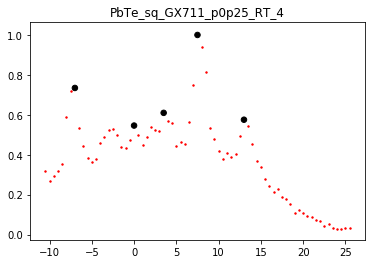

In [32]:
##### find peak automatically
processor.find_peak(order=5, notice=True)


### make figure
fig = plt.figure()
ax = fig.add_subplot(111)
processor.plot(ax)
processor.peak_idx_lst

index %s is already in the peak_idx_lst !
index %s is already in the peak_idx_lst !


[7, 15, 21, 28, 36, 47, 55]

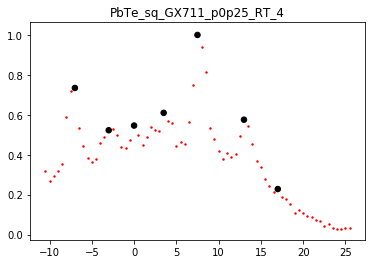

In [34]:
##### add peak by hand

### test mode
# processor.add_peak(idx=55, run_mode='test')

### add mode
processor.add_peak(idx=55, run_mode='add')
processor.add_peak(idx=15, run_mode='add')

### make figure
fig = plt.figure()
ax = fig.add_subplot(111)
processor.plot(ax)
processor.peak_idx_lst

In [20]:
##### remove peak by hand
# processor.remove_peak(21)
# print(processor.peak_idx_lst)

found 3 pair
[[7, 47], [15, 36], [21, 28]]


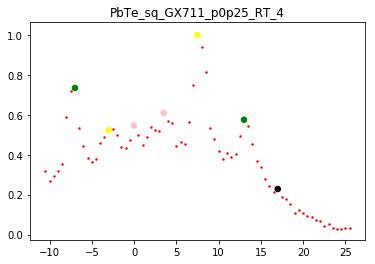

In [35]:
##### find peak pair automatically
processor.find_peak_pair(threshold=10, notice=True)
print(processor.peak_pair_idx_lst)

### make figure
fig = plt.figure()
ax = fig.add_subplot(111)
processor.plot(ax)

current peak_idx_lst
[7, 15, 21, 28, 36, 47, 55]

initial peak_pair_idx_lst
[[7, 47], [15, 36], [21, 28]]

revised peak_pair_idx_lst
[[7, 36], [15, 28]]


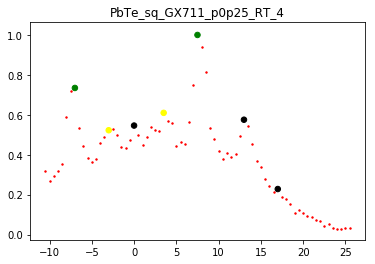

In [22]:
##### find peak pair by hand
print("current peak_idx_lst")
print(processor.peak_idx_lst)
print("")
print("initial peak_pair_idx_lst")
print(processor.peak_pair_idx_lst)

### test
# processor.revise_peak_pair([[7,36], [15,28]], run_mode='test')

### revise
processor.revise_peak_pair([[7,36], [15,28]], run_mode='revise')

print("")
print("revised peak_pair_idx_lst")
print(processor.peak_pair_idx_lst)

### make figure
fig = plt.figure()
ax = fig.add_subplot(111)
processor.plot(ax)

make initial fitting
index 7 could not make curve_fit
index 15 could not make curve_fit
index 21 could not make curve_fit
index 28 could not make curve_fit
index 36 could not make curve_fit
index 47 could not make curve_fit
index 55 could not make curve_fit


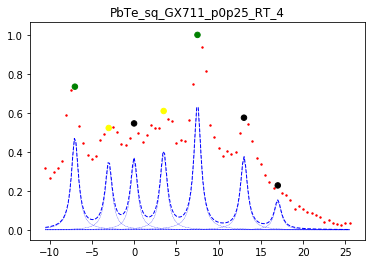

In [23]:
##### initial fit
processor.initial_fit(idx_range=5, notice=True)


### make figure
fig = plt.figure()
ax = fig.add_subplot(111)
processor.plot(ax)

[[0.7345, -7.0, 1.0], [0.5227, -3.0, 1.0], [0.5461, 0.0, 1.1], [0.6098, 3.5, 1.0], [1.0, 7.5, 1.0], [0.5754, 13.0, 1.0], [0.2282, 17.0, 1.0]]


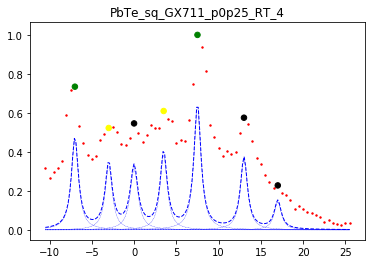

In [24]:
##### revise best param by hand
"""
processor.revise_best_param(arg_lst)
arg_lst = [peak_idx, var_num, addition or subtraction]
    var_num => 0: peak_y
               1: peak_x
               2: width
"""

### peak_y
# processor.revise_best_param([[1,2,3], 0, 0.1])

### peak_x
# processor.revise_best_param([3, 1, -0.1])

### width
processor.revise_best_param([[2] ,2, 0.1])

### make figure
fig = plt.figure()
ax = fig.add_subplot(111)
processor.plot(ax)
print(processor.best_param_lst)

iteration number: 1


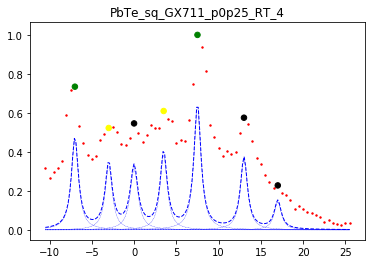

iteration number: 2


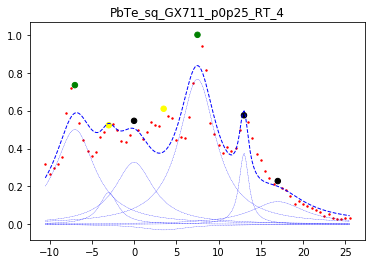

iteration number: 3


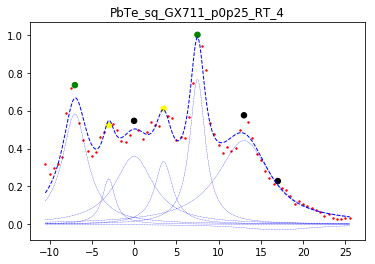

iteration number: 4


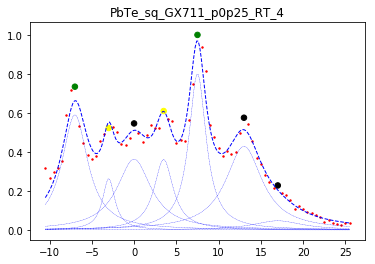

iteration number: 5
Optimization terminated successfully.
         Current function value: 0.051032
         Iterations: 808
         Function evaluations: 1147


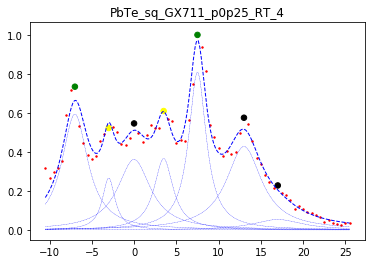

In [26]:
processor.set_function(x0_constant=True)
processor.fit(iteration=5, log=False)

In [ ]:
##### set center
### if input index is in self.peak_pair_lst, centering is executed using that pair
processor.set_center(2)
print(processor.center_move)
print(processor.center_peak)

fig = plt.figure()
ax = fig.add_subplot(111)
processor.plot(ax)

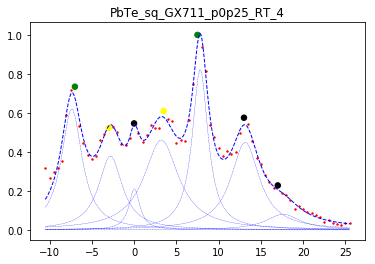

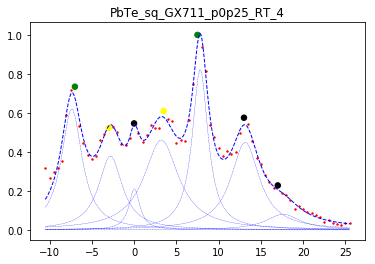

In [317]:
##### save results
### make hdf5 file and figure
savefile = os.path.basename(filename)
processor.save(savefile=savefile)

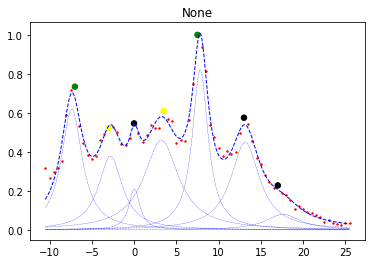

In [320]:
##### reload from hdf5 file
new_processor = sm_fit.Processor(x_arr, y_arr)
new_processor.load(savefile+'.hdf5')

### make figure
fig = plt.figure()
ax = fig.add_subplot(111)
new_processor.plot(ax)